In [2]:
## do all imports here
import numpy as np
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from google.colab import files

## downloaded csv file from url and importing it into notebook
weather_data = files.upload()
energy_data = files.upload()

weather_data = pd.read_csv('weather_data.csv') ## opening weather data
energy_data = pd.read_csv('energy_data.csv') ## opening energy data



Saving weather_data.csv to weather_data.csv


Saving energy_data.csv to energy_data.csv


In [12]:
## Task 1

copy_energy = energy_data

## adding a column just for the date in copy_energy
just_time = []

for i in range(365):  
  for j in range(48):
    index = i * 48 + j
    time = energy_data.at[index, 'Date & Time'] 
    time = time[0:10]
    just_time.append(time)

copy_energy["Date"] = just_time 


## grouping copy_energy by the date
columns = copy_energy.columns[1:18:1]
daily_energy = copy_energy.groupby(["Date"])[columns].sum() ## adding per day usage

## copying time value in weather data into energy data
energy_every_two = energy_data
energy_every_two = energy_every_two.iloc[::2, :] ## only retreiving every two rows

energy_every_two.head()

unix_times = [] ## converting unix times

## adding unix time to energy_every_two
for i in range(365):  
  for j in range(24):
    index = i * 24 + j
    time = weather_data.at[index, 'time']
    unix_times.append(time)

energy_every_two["time"] = unix_times


merged_data = pd.merge(weather_data, energy_every_two) ## merging the two altered datasets together

## grouping by day in weather_data

columns_to_average = []

## only getting the necesary columns
grouped_merged_data = merged_data.copy()
grouped_merged_data = grouped_merged_data.groupby("Date")["temperature","humidity", "visibility", "pressure", "windSpeed", "cloudCover", "windBearing", "precipIntensity", "dewPoint", "precipProbability"].mean()

## grouped_merged_data.head()
## daily_energy.head()

daily_merged_data = grouped_merged_data.join(daily_energy)

print(daily_merged_data)


## merged_data2 = pd.merge(grouped_merged_data, daily_energy)

## What we need: merge the grouped_energy data with the weather_data that is averaged per day
## print(merged_data2)

## Task 2

## split the merged_data into training and testing datasets
merged_data_copy = merged_data.copy()
daily_merged_data_copy = daily_merged_data.copy()

columns = energy_data.columns[2:18:1]

for i in range(len(columns)):
    del merged_data_copy[columns[i]] ## removing each column
    del daily_merged_data_copy[columns[i]]

training_data = daily_merged_data_copy.head(334)
testing_data = daily_merged_data_copy.tail(31)

testing_data_without_label = testing_data.copy()
y_actual = testing_data["use [kW]"]
del testing_data_without_label["use [kW]"]


            temperature  humidity  visibility     pressure  windSpeed  \
Date                                                                    
2014-01-01    20.110833  0.556667    9.970000  1025.395000   6.820417   
2014-01-02    16.382500  0.784583    3.834583  1023.465833   7.433750   
2014-01-03     6.256667  0.680833    4.509167  1014.428750  12.828333   
2014-01-04     2.711667  0.617083    9.822917  1030.096250   5.248333   
2014-01-05    17.654167  0.682083    9.134583  1025.275000   3.417083   
...                 ...       ...         ...          ...        ...   
2014-12-27    35.487083  0.756250    9.246250  1022.081667   3.677083   
2014-12-28    41.892917  0.763750    9.332917  1013.549167   6.587917   
2014-12-29    34.728333  0.592083    9.997083  1018.870833   8.129583   
2014-12-30    24.846667  0.488750    9.998333  1026.102083   7.566667   
2014-12-31    19.522917  0.552917    9.986250  1025.940833   5.943750   

            cloudCover  windBearing  precipIntensi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [13]:
## Task 3
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
from math import sqrt
import csv


columns = testing_data_without_label.columns ## retrieving columns to group

x_train = training_data[columns] ## only getting the necesary columns
y_train = training_data['use [kW]']   ## dependent variables
## print(x_train)
x_train = np.reshape(x_train, (334, 10)) ## shaping the data


testing_data_without_label = np.reshape(testing_data_without_label, (31, 10)) ## shaping testing data

LR = LinearRegression() ## setting up linear regression model
LR = LR.fit(x_train,y_train) ## training the model

prediction =  LR.predict(testing_data_without_label) ## testing the model

## print(prediction)
## print(y_actual)

rms = sqrt(mean_squared_error(y_actual, prediction)) ## rms calculation

print("Root mean square error value : " + str(rms))
## rms value is apx 8.629 || max-value: 44.563400 || min-value: 19.387136
adjusted_rms = rms / (44.563400 - 19.387136)
print("Adjusted rmse value: " + str(adjusted_rms)) 
## rms value is 0.3423 is which around an average fitting model. Closer to 0 is perfect and closer to 1 is considered a bad model. 



## creating csv file
dates = testing_data.index

with open('kw_prediction.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Predicted Value"])
    for i in range(len(prediction)):
        writer.writerow([dates[i], prediction[i]]) ## writing the data into the file
        
        

predictor = pd.read_csv('kw_prediction.csv')
print(predictor)

Root mean square error value : 8.629044152737501
Adjusted rmse value: 0.3427452203685782
          Date  Predicted Value
0   2014-12-01        30.640995
1   2014-12-02        31.771946
2   2014-12-03        18.535163
3   2014-12-04        31.506958
4   2014-12-05        23.720011
5   2014-12-06        21.470628
6   2014-12-07        22.177421
7   2014-12-08        24.715977
8   2014-12-09        20.536352
9   2014-12-10        18.808375
10  2014-12-11        20.117905
11  2014-12-12        22.047780
12  2014-12-13        25.695860
13  2014-12-14        24.481432
14  2014-12-15        28.048542
15  2014-12-16        16.850926
16  2014-12-17        23.628356
17  2014-12-18        26.174668
18  2014-12-19        25.953018
19  2014-12-20        25.473606
20  2014-12-21        15.427852
21  2014-12-22        13.876996
22  2014-12-23        14.176729
23  2014-12-24        17.301925
24  2014-12-25        30.294769
25  2014-12-26        34.086540
26  2014-12-27        26.694369
27  2014-12-28 

In [14]:
## Task 4
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

weather_copy = grouped_merged_data.copy()
temperatures = weather_copy["temperature"]
binary_temp = []

## classfying high and low data
for i in range(len(temperatures)):
  if temperatures[i] < 35:
    binary_temp.append(0)
  else:
    binary_temp.append(1)

weather_copy["temperature"] = binary_temp ## adding column to the table

weather_copy.head(10)

training_data = weather_copy.head(334)
testing_data = weather_copy.tail(31)

y_actual = testing_data["temperature"]
testing_data_with_label = testing_data.copy()
del testing_data["temperature"]

columns = testing_data.columns
x_train = training_data[columns]   ## independent variables
y_train = training_data['temperature']   ## dependent variables

logreg = LogisticRegression() ## setting up logistic reg. model
logreg.fit(x_train,y_train) ## training log model

prediction = logreg.predict(testing_data) ## testing the model

f1score = f1_score(y_actual, prediction) ## calculating f1 score
print("Fl score: " + str(f1score))

dates = testing_data.index

## received a f1 score of around 0.7027

## creating csv file
with open('temp_predictor.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Date", "Temperature Classification"])
    for i in range(len(prediction)):
        writer.writerow([dates[i], prediction[i]]) ## writing data
        
        

predictor = pd.read_csv('temp_predictor.csv')
print(predictor)


Fl score: 0.7027027027027027
          Date  Temperature Classification
0   2014-12-01                           1
1   2014-12-02                           1
2   2014-12-03                           1
3   2014-12-04                           1
4   2014-12-05                           0
5   2014-12-06                           0
6   2014-12-07                           1
7   2014-12-08                           0
8   2014-12-09                           1
9   2014-12-10                           1
10  2014-12-11                           0
11  2014-12-12                           1
12  2014-12-13                           1
13  2014-12-14                           1
14  2014-12-15                           1
15  2014-12-16                           1
16  2014-12-17                           1
17  2014-12-18                           1
18  2014-12-19                           1
19  2014-12-20                           0
20  2014-12-21                           1
21  2014-12-22           

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


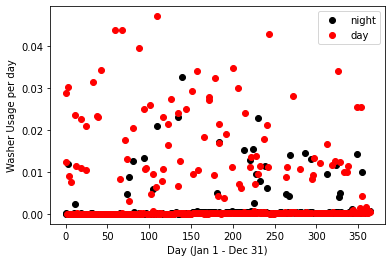

In [20]:
## Task 5
import matplotlib.pyplot as plt

energy_data2 = energy_data.copy()
date_and_time = energy_data2["Date & Time"]

just_time = []

## 6AM - 7PM is considered daytime, rest is night time

for i in range(len(date_and_time)):
  digit = int(date_and_time[i][11:13])
  if digit >= 6 and digit < 19:
    just_time.append(1) ## 1 is daytime
  else:
    just_time.append(0) ## 0 is nighttime

energy_data2["daytime"] = just_time

grouped_data_with_washer = energy_data2.groupby(["Date","daytime"])["Washer [kW]"].mean()
grouped_data_with_ac = energy_data2.groupby(["Date","daytime"])["AC [kW]"].mean()


y1_data = []
y2_data = []
x_data = []


for i in range(len(grouped_data_with_washer)):
  if i % 2 == 0:
    y1_data.append(grouped_data_with_washer[i]) ## y1 data contains nighttime data
    x_data.append(i / 2)
  else:
    y2_data.append(grouped_data_with_washer[i]) ##y2 data contains daytime data

## First graph is washer
plt.plot(x_data, y1_data, 'o', color='black', label="night"); ## black is nighttime
plt.plot(x_data, y2_data, 'o', color='red', label="day"); ## red is daytime

plt.xlabel("Day (Jan 1 - Dec 31)")
plt.ylabel("Washer Usage per day")

plt.gca().legend(('night','day'))

## people generally use the washer more during the daytime rather than the night time


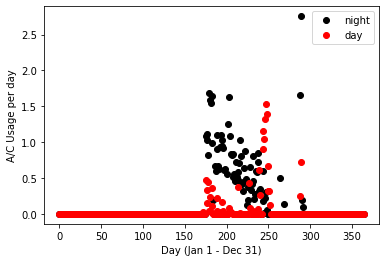

In [21]:
## Task 5 Continued

y1_data = []
y2_data = []
x_data = []

for i in range(len(grouped_data_with_ac)):
  if i % 2 == 0:
    y1_data.append(grouped_data_with_ac[i])
    x_data.append(i / 2)
  else:
    y2_data.append(grouped_data_with_ac[i])


## First graph is washer
plt.plot(x_data, y1_data, 'o',color='black')
plt.plot(x_data, y2_data, 'o',color='red')

plt.xlabel("Day (Jan 1 - Dec 31)")
plt.ylabel("A/C Usage per day")

plt.gca().legend(('night','day'))



## results show people use the ac more during the night time compared to the daytime and mostly during the summer months (Day 175 - Day 250) is roughly 